In [57]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from pymongo import MongoClient
from datetime import datetime

In [40]:
client = MongoClient('localhost', 27017)
db_client = client['cosrx_db']
collection = db_client['data_label_total']
collection_mlp = db_client['data_label_total_mlp']

In [41]:
data = pd.DataFrame(list(collection.find()))
data.head(10)

,_id,id,tanggal_dibuat,tweet_in,tweet_en,sentiment,polarity
0,5fe1ef1aa5957c6a855d07cb,1091120986827575300,Thu Jan 31 23:48:09 +0000 2019,cosrx ya kak,Sosrh I'm like,netral,0.00
1,5fe1ef1aa5957c6a855d07cc,1091118780040634400,Thu Jan 31 23:39:23 +0000 2019,aku kalo benton biasanya satu pam di taruh di ...,I usually put one pam in my hand and then spre...,negatif,-0.25
2,5fe1ef1ba5957c6a855d07cd,1091024132043460600,Thu Jan 31 17:23:17 +0000 2019,krn aku pake cosrx aha bha cocok dan muka ku k...,"Because I use Cosrx, aha bha suits and my face...",positif,0.10
3,5fe1ef1ba5957c6a855d07ce,1091005199471112200,Thu Jan 31 16:08:04 +0000 2019,masih cosrx centella non alcohol toner biore w...,still cosrx centella non alcohol toner biore w...,netral,0.00
4,5fe1ef1ba5957c6a855d07cf,1091004244256116700,Thu Jan 31 16:04:16 +0000 2019,semuanya wkwkwk krn sebucin itu sama cosrx ini...,everyone wkwkwk because it's as cute as this c...,positif,0.30
5,5fe1ef1ca5957c6a855d07d0,1090999586326405100,Thu Jan 31 15:45:45 +0000 2019,aku mau cosrx essence yang snail mucin,I want a snail mucin Cosrx essence,netral,0.00
6,5fe1ef1ca5957c6a855d07d1,1090992908411400200,Thu Jan 31 15:19:13 +0000 2019,toner cosrx aha bha,The tone corrects,netral,0.00
7,5fe1ef1ca5957c6a855d07d2,1090980101246861300,Thu Jan 31 14:28:20 +0000 2019,depends on jual apa kott dulu jual my cosrx st...,"depends on what Kott sells first, sell my Cosr...",positif,0.25
8,5fe1ef1da5957c6a855d07d3,1090977182480969700,Thu Jan 31 14:16:44 +0000 2019,mau beli cosrx aha bha tapi maju mundur,want to buy cosrx aha bha but back and forth,netral,0.00
9,5fe1ef1da5957c6a855d07d4,1090970267487109100,Thu Jan 31 13:49:15 +0000 2019,aku pake cosrx centella blesmish aja si,I just used Cosrx Centella Blesmish,netral,0.00


<AxesSubplot:>

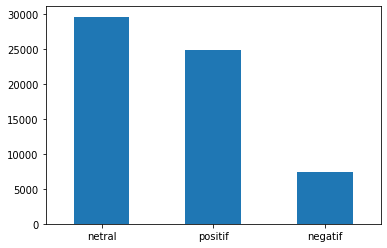

In [32]:
data['sentiment'].value_counts().plot.bar(rot=0)

In [36]:
data['sentiment'].value_counts()

netral     29603
positif    24801
negatif     7363
Name: sentiment, dtype: int64

In [6]:
def convert_to_bin(text, remove_digits=True):
    if text=='positif':
        text= 1
    elif text=='netral':
        text=1
    else:
        text=0
    return text

In [7]:
def convert_to_sentiment(value):
    if value==1:
        value = 'positif'
    else:
        value = 'negatif'
    return value

In [62]:
def convert_date(dtime):
    new_date = datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y/%m/%d')
    return new_date

In [8]:
prepared = data.drop(columns=['_id', 'id', 'tanggal_dibuat', 'tweet_in', 'polarity'])
# data['sentiment'] = data['sentiment'].apply(convert_to_bin)

In [9]:
X = prepared['tweet_en'].values
y = prepared['sentiment'].values
prepared.head()

,tweet_en,sentiment
0,Sosrh I'm like,netral
1,I usually put one pam in my hand and then spre...,negatif
2,"Because I use Cosrx, aha bha suits and my face...",positif
3,still cosrx centella non alcohol toner biore w...,netral
4,everyone wkwkwk because it's as cute as this c...,positif


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400)

In [11]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

49413
12354
49413
12354


In [12]:
clf = MLPClassifier()

In [13]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [14]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf)])

In [15]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MLPClassifier())])

In [17]:
hasil=model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(hasil,y_test)

0.9628460417678485

In [19]:
all_data_set = model.predict(X) 

In [20]:
data = {
    'tweet_en':X,
    'sentiment_MLP': all_data_set
}
mlp_data = pd.DataFrame(data)
mlp_data['sentiment_MLP'] = mlp_data['sentiment_MLP']

In [21]:
mlp_data.head()

,tweet_en,sentiment_MLP
0,Sosrh I'm like,netral
1,I usually put one pam in my hand and then spre...,negatif
2,"Because I use Cosrx, aha bha suits and my face...",positif
3,still cosrx centella non alcohol toner biore w...,netral
4,everyone wkwkwk because it's as cute as this c...,positif


<AxesSubplot:>

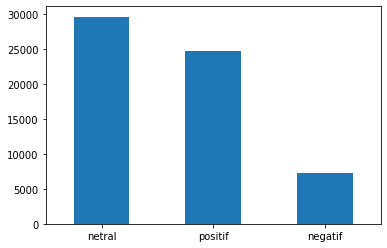

In [22]:
mlp_data['sentiment_MLP'].value_counts().plot.bar(rot=0)

In [23]:
mlp_data['sentiment_MLP'].value_counts()

netral     29670
positif    24775
negatif     7322
Name: sentiment_MLP, dtype: int64

In [67]:
data = pd.DataFrame(list(collection.find()))
data["sentiment"].replace(mlp_data['sentiment_MLP'])

0         netral
1        negatif
2        positif
3         netral
4        positif
          ...   
61762    negatif
61763    positif
61764    negatif
61765     netral
61766    positif
Name: sentiment, Length: 61767, dtype: object

In [70]:
data.head()

,_id,id,tanggal_dibuat,tweet_in,tweet_en,sentiment,polarity
0,5fe1ef1aa5957c6a855d07cb,1091120986827575300,Thu Jan 31 23:48:09 +0000 2019,cosrx ya kak,Sosrh I'm like,netral,0.00
1,5fe1ef1aa5957c6a855d07cc,1091118780040634400,Thu Jan 31 23:39:23 +0000 2019,aku kalo benton biasanya satu pam di taruh di ...,I usually put one pam in my hand and then spre...,negatif,-0.25
2,5fe1ef1ba5957c6a855d07cd,1091024132043460600,Thu Jan 31 17:23:17 +0000 2019,krn aku pake cosrx aha bha cocok dan muka ku k...,"Because I use Cosrx, aha bha suits and my face...",positif,0.10
3,5fe1ef1ba5957c6a855d07ce,1091005199471112200,Thu Jan 31 16:08:04 +0000 2019,masih cosrx centella non alcohol toner biore w...,still cosrx centella non alcohol toner biore w...,netral,0.00
4,5fe1ef1ba5957c6a855d07cf,1091004244256116700,Thu Jan 31 16:04:16 +0000 2019,semuanya wkwkwk krn sebucin itu sama cosrx ini...,everyone wkwkwk because it's as cute as this c...,positif,0.30


In [71]:
data["tanggal_dibuat"] = data["tanggal_dibuat"].apply(convert_date)

In [72]:
data.head()

,_id,id,tanggal_dibuat,tweet_in,tweet_en,sentiment,polarity
0,5fe1ef1aa5957c6a855d07cb,1091120986827575300,2019/01/31,cosrx ya kak,Sosrh I'm like,netral,0.00
1,5fe1ef1aa5957c6a855d07cc,1091118780040634400,2019/01/31,aku kalo benton biasanya satu pam di taruh di ...,I usually put one pam in my hand and then spre...,negatif,-0.25
2,5fe1ef1ba5957c6a855d07cd,1091024132043460600,2019/01/31,krn aku pake cosrx aha bha cocok dan muka ku k...,"Because I use Cosrx, aha bha suits and my face...",positif,0.10
3,5fe1ef1ba5957c6a855d07ce,1091005199471112200,2019/01/31,masih cosrx centella non alcohol toner biore w...,still cosrx centella non alcohol toner biore w...,netral,0.00
4,5fe1ef1ba5957c6a855d07cf,1091004244256116700,2019/01/31,semuanya wkwkwk krn sebucin itu sama cosrx ini...,everyone wkwkwk because it's as cute as this c...,positif,0.30


In [74]:
new = db_client['data_label_total_mlp_convert_date']
new.insert_many(data.to_dict('records'))